<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/Advanced_Langchain_RAG_Implementaion_using_Mistral_AI_and__Embed_Caching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qU langchain Faiss-gpu tiktoken sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 109.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.3 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-65nm4x_r
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-65nm4x_r
  Resolved https://github.com/huggingface/transformers to commit 897a826d830e8b1e03eb482b165b5d88a7a08d5f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.35.0.dev0-py3-none-any.whl size=7745571 sha256=21483fcd3f11cdb56ed465fbbacc3a841e31091c42f23c9b89c051ae96cfd1f7
  Stored in directory: /tmp/pip-ephem-wheel-cache-e84wzfne/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.34.0
    Uninstalling transformers-4.34.0:
      Successfully uninstalled transformers-4.34.0


In [ ]:
!pip install -qU trl Py7zr auto-gptq optimum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.0/301.0 kB 36.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 97.9

In [ ]:
# Base ctransformers with CUDA GPU acceleration
! pip install ctransformers[cuda]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 67.9 MB/s eta 0:00:00


In [ ]:
!pip install PyPdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.3/276.3 kB 6.1 MB/s eta 0:00:00


In [ ]:
pip install rank_bm25

## Load Dataset

## Data Parsing using langchain

In [ ]:
from langchain.document_loaders import PyPDFLoader
#
esops_loader = PyPDFLoader("/content/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf").load()
print(f"len of documents in :{len(esops_loader)}")
#

len of documents in :44


## Create Managebale pieces of text by using RecursiveCharacterTextSplitter to create chunks for reviews

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
#
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500,
                                      chunk_overlap=100,
                                      length_function=len,)
#
esops_documents = text_splitter.transform_documents(esops_loader)
print(f"number of chunks in barbie documents : {len(esops_documents)}")


number of chunks in barbie documents : 45


## Create Vectorstore

* Here we will leverage a CacheBackedEmbeddings to prevent us from reembedding similar queries over and over again.
* Structured documents will be passed into a usesful format for querying ,retrieving and use in LLM application
* here we will use FAISS(Facebook AI similarity search) as the vectorstore.

In [ ]:
from langchain.embeddings import CacheBackedEmbeddings,HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.storage import LocalFileStore
from langchain.retrievers import BM25Retriever,EnsembleRetriever

In [ ]:
store = LocalFileStore("./cache/")
#embed_model_id = 'sentence-transformers/all-MiniLM-L6-v2'
#changed the embedding model
embed_model_id = 'BAAI/bge-small-en-v1.5'
core_embeddings_model = HuggingFaceEmbeddings(model_name=embed_model_id)
embedder = CacheBackedEmbeddings.from_bytes_store(core_embeddings_model,
                                                  store,
                                                  namespace=embed_model_id)

## Create Vectorstore

In [ ]:
vectorstore = FAISS.from_documents(esops_documents,embedder)

## Create Sparse Embedding

In [ ]:
bm25_retriever = BM25Retriever.from_documents(esops_documents)

In [ ]:
bm25_retriever.k=15

## Embed Query - bge-small-en-v1.5

In [ ]:
query = "What is the early stage grant for CTO in ESOP alocation?"
embedding_vector = core_embeddings_model.embed_query(query)
len(embedding_vector)

384

## Retrieve passages from the vectorstore that are similar to the query

In [ ]:
docs = vectorstore.similarity_search_by_vector(embedding_vector,k=15)

## Retrieved - content -  bge-small-en-v1.5 embedding

In [ ]:
for page in docs:
  print(page.page_content)
  print("\n")

Table of Contents  
Part I: Intro to Options Plans  
•What is an ESOP?  
•What is an Option?  
•Lifecycle of a Startup ESOP  
•Common Terms in an Options Package  
•Why Issue Options to Employees ? 
–A Defining Characteristic of Startup Culture  
–A Necessary Part of the Capital Structure  
•When to Create an ESOP ? 
•Communicating Options to Employees: % versus $ 
 
Part II: How Much to Grant  
•Two Approaches  
•The Top -Down Process  
–1. How Much Equity to Set Aside in the ESOP ? 
–2. A Typical Distribution Schedule  
•The Bottom -Up Process  
–1. Segment Your Human Resources  
–2. Establish Pay Multipliers for Each Role 
–3. Determine the Dollar Value of the Options Grant  
–4. Determine the Current Share Price  
–5. Calculate the Options Grant  
–An Example: Hiring a CTO  
•Important Takeaways  Part III : The Fine Print – Terms  
•Strike Price  
•Vesting Schedule  
•The Cliff  
–Example: Standard Vesting w/ a Cliff 
•Vesting in a Liquidity Event  
•Exercising Options  
•Tax Consi

## Check to see  how much time CacheBackedEmbeddings pattern saves us

In [ ]:
%%timeit -n 1 -r 1
query = "What is the early stage grant for CTO in ESOP alocation?"
#
embedding_vector = core_embeddings_model.embed_query(query)
docs = vectorstore.similarity_search_by_vector(embedding_vector,k=15)

20 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Ensemble Retriever

In [ ]:
faiss_retriever = vectorstore.as_retriever(search_kwargs={"k":15})
ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever,faiss_retriever],
                                       weights=[0.5,0.5])

## Building a retrieval chain

#### Initialize LLM using a quantized GPTQ Model

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.1-GPTQ"
# To use a different branch, change revision
# For example: revision="gptq-4bit-32g-actorder_True"
model = AutoModelForCausalLM.from_pretrained(model_name_or_path,
                                             device_map="auto",
                                             trust_remote_code=False,
                                             revision="gptq-8bit-32g-actorder_True")
#
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


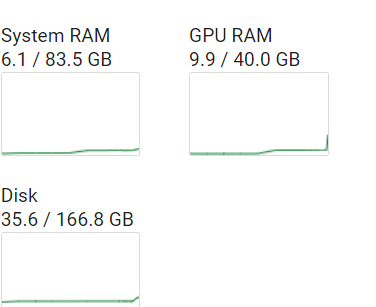

In [ ]:
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,
    do_sample=True,
    temperature=0.1,
    top_p=0.95,
    top_k=40,
    repetition_penalty=1.1
)

In [ ]:
from langchain.llms import HuggingFacePipeline
llm = HuggingFacePipeline(pipeline=pipe)

## Caching

In [ ]:
import langchain
from langchain.cache import InMemoryCache
langchain.llm_cache = InMemoryCache()

## Setup Retrieval chain

In [ ]:
from langchain.chains import RetrievalQA
from langchain.callbacks import StdOutCallbackHandler
#
handler = StdOutCallbackHandler()
#
qa_with_sources_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    #retriever = vectorstore.as_retriever(search_kwargs={"k":15}),
    #retriever = vectorstore.as_retriever(),
    retriever = ensemble_retriever,
    callbacks=[handler],
    return_source_documents=True
)

## Provide the user query

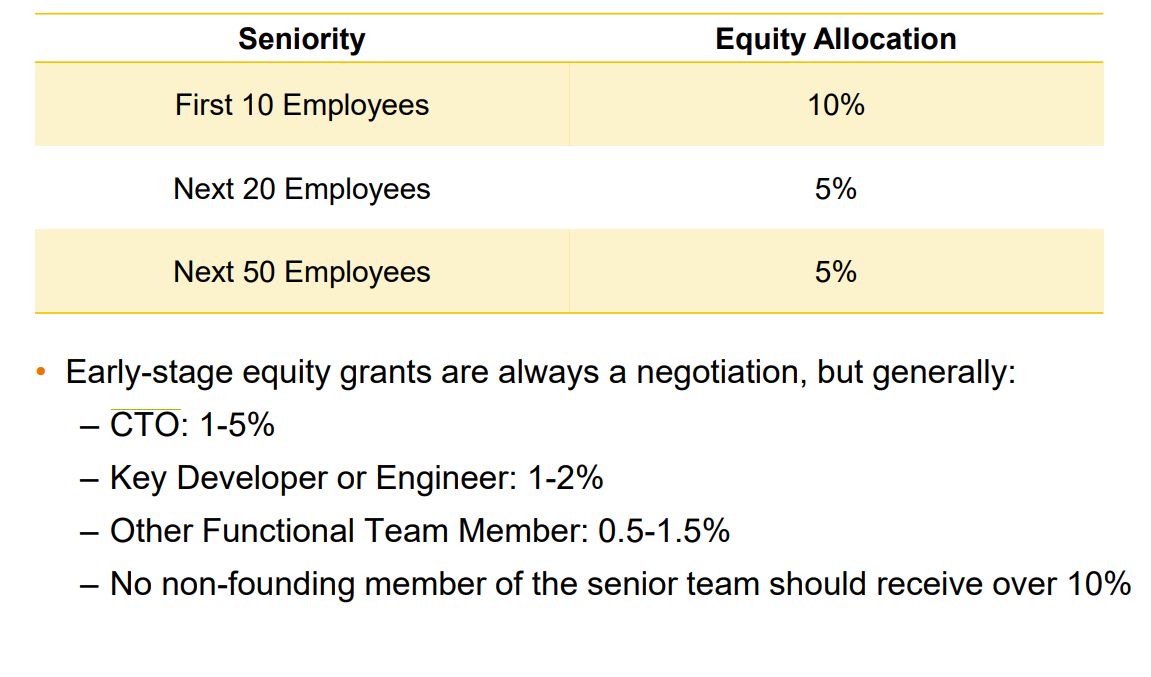

In [ ]:
%%time
query = "What is the early stage grant for CTO in ESOP alocation?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")




> Entering new RetrievalQA chain...


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1421: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(



> Finished chain.
Response generated : 
  For an early-stage CTO in an ESOP allocation, 1% of the company is a good starting point for determining the amount of equity to be allocated for that particular employee. However, keep in mind that the grant percentage will depend on various factors such as the size of the company, the specific role of the CTO within the organization, and the industry in which the company operates. It's also important to note that the amount of equity granted to employees will need to be balanced against the company's ongoing needs for funding and growth, as well as the potential for future equity raises.
Source Documents : 
 [Document(page_content='When to Create an ESOP?  \nStage  Considerations  Takeaway  \nPre-seed  Founders focused on traction  (often too \nbusy for an ESOP).  Key employees are \ngiven equity/options on an ad hoc basis  ESOP  not necessary, but it can be \nhelpful to sanity check how much equity \nyou are giving away to early hires  \nSe

## Coz of caching the inference was faster and the result remains the same as that of before.

In [ ]:
%%time
query = "What is the early stage grant for CTO in ESOP alocation?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  For an early-stage CTO in an ESOP allocation, 1% of the company is a good starting point for determining the amount of equity to be allocated for that particular employee. However, keep in mind that the grant percentage will depend on various factors such as the size of the company, the specific role of the CTO within the organization, and the industry in which the company operates. It's also important to note that the amount of equity granted to employees will need to be balanced against the company's ongoing needs for funding and growth, as well as the potential for future equity raises.
Source Documents : 
 [Document(page_content='When to Create an ESOP?  \nStage  Considerations  Takeaway  \nPre-seed  Founders focused on traction  (often too \nbusy for an ESOP).  Key employees are \ngiven equity/options on an ad hoc basis  ESOP  not necessary, but it can be \nhelpful to sanity check how much equity \nyo

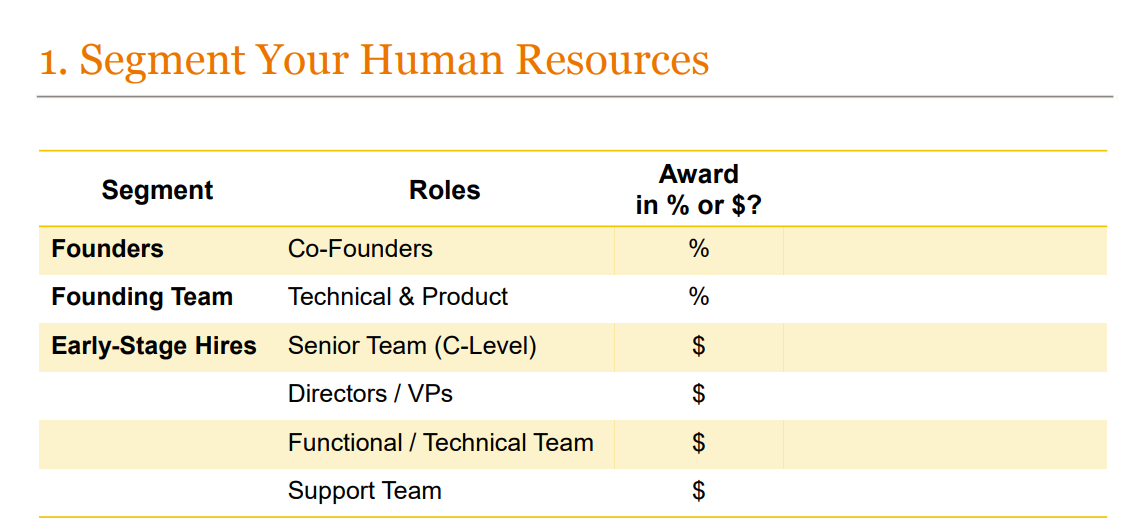

In [ ]:
%%time
query = "What are the segments in humjan resources?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  The segments in human resources are founders, co-founders, founding team, early-stage hires, senior team (C-level), directors/VPs, functional/technical team, support team.
Source Documents : 
 [Document(page_content='1. Segment Your Human Resources  \nSegment  Roles  Award  \nin % or $?  \nFounders  Co-Founders  % \nFounding Team  Technical & Product  % \nEarly -Stage Hires  Senior Team  (C-Level)  $ \nDirectors / VPs  $ \nFunctional / Technical Team  $ \nSupport Team  $ \n•Think about the early -stage team in three segments  \n–Founders : the founding partners in the business  \n–Founding Team : the people you hire to build your product  \n–Early -Stage Hires : the team you build as you raise capital  \n•As early as possible, begin communicating options grants in terms of \ndollars rather than percentages', metadata={'source': '/content/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf', 'page': 18}),

In [ ]:
%%time
query = "What is the early stage grant for Developer or Engineer in ESOP alocation?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  In order to determine the appropriate early stage grant for a developer or engineer in an ESOP allocation, one should look at the company's stage, the size of the team, and the average salary of developers or engineers in the area where the company is located. Based on these factors, a typical range for the early stage grant for a developer or engineer in an ESOP allocation might be between 0.25x and 0.5x the employee's base salary. However, this is just a rough estimate and the actual grant may vary depending on other factors, such as the employee's level of experience and skill.
Source Documents : 
 [Document(page_content='When to Create an ESOP?  \nStage  Considerations  Takeaway  \nPre-seed  Founders focused on traction  (often too \nbusy for an ESOP).  Key employees are \ngiven equity/options on an ad hoc basis  ESOP  not necessary, but it can be \nhelpful to sanity check how much equity \nyou are giv

In [ ]:
%%time
query = "What is the early stage grant for non founding member of senior team in ESOP alocation?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 
There is no hard and fast rule, but by looking at the company's founders, its DNA, its geographic focus, and its hiring needs you can begin to benchmark how much equity to set aside for the ESOP.

1. Segment Your Human Resources  
Segment  Roles  Award  
in % or $?  Options Multiplier  
(Multiple  of Salary)  
Founders  Co-Founders  % -- 
Founding Team  Technical & Product  % 
Early -Stage Hires  Senior Team  (C -Level)  $ 
Directors / VPs  $ 
Functional / Technical Team  $ 
Support Team  $ 
•Think about the early -stage team in three segments  
–Founders : the founding partners in the business  
–Founding Team : the people you hire to build your product  
–Early -Stage Hires : the team you build as you raise capital  
•As early as possible, begin communicating options grants in terms of 
dollars rather than percentages  

1. Establish Pay Multipliers for Each Role  
Segment  Roles  Award  
in % or $?  Opt

In [ ]:
%%time
query = "What is the early stage grant for Functional Team member of senior team in ESOP alocation?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  An appropriate grant for a Functional Team member of senior team in an ESOP allocation varies depending on the company’s needs and overall distribution schedule. However, typically, the early stage allocation for this position is between 10% and 20%. For example, for a Functional Team member of senior team that is part of the founding team, a grant of 15% to 20% is not uncommon. It is important to note that the specific allocation for this position should be carefully considered and communicated to the employee to avoid confusion and misunderstandings.
Source Documents : 
 [Document(page_content='2. A Typical Distribution Schedule  \nSeniority  Equity Allocation  \nFirst 10 Employees  10% \nNext 20 Employees  5% \nNext 50 Employees  5% \n•Early -stage equity grants are always a negotiation, but generally:  \n–CTO: 1 -5% \n–Key Developer or Engineer: 1 -2% \n–Other Functional Team Member: 0.5 -1.5%  \n–No n

In [ ]:

query = "What is the document about?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  The document is about options plans for startup employees. It explains what an ESOP is, what an option is, and how options can be used in a startup. It also covers the different approaches to determining how much equity to set aside in an ESOP, how to determine the dollar value of an options grant, and how to calculate the options grant. Additionally, the document discusses the importance of communicating options to employees, the different terms that can be included in an options package, and the potential tax implications of options for employees. Finally, the document touches on the fine print of options plans, including strike prices, vesting schedules, and cliffs.
Source Documents : 
 [Document(page_content='What is an ESOP?  \n•An Employee Stock Options Plan (ESOP)  \n \n•An allocation  of shares that will be granted to employees in the future \nin the form of stock options  \n–How much equity should